# Homework 1 - Duc Trinh

In [4]:
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [5]:
import math

In [2]:
#BeautifulSoup stuff
from urllib.request import urlopen
import bs4 

In [5]:
#WordCloud stuff
import numpy as np
from os import path
from PIL import Image

import sys
!{sys.executable} -m pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Exercise 1:
<br>**a)**

In [6]:
countries = pd.read_csv('../Data/countries.csv', names = ['geo.name', 'region'], skiprows = 1)

In [7]:
countries.head()

,geo.name,region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


In [8]:
income = pd.read_excel("https://github.com/Gapminder-Indicators/gdppc_cppp/raw/master/gdppc_cppp-by-gapminder.xlsx",sheet_name = 1, usecols = [0]+list(range(4, 245)))

In [9]:
income.head(3)

,geo.name,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,603.0,...,2416.0,2469.0,2524.0,2580.0,2637.0,2695.0,2755.0,2816.0,2878.0,2942.0
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
life_exp = pd.read_excel("https://github.com/Gapminder-Indicators/lex/raw/master/lex-by-gapminder.xlsx", sheet_name = 1,usecols = [0]+list(range(4,305)))

In [11]:
life_exp.head(2)

,geo.name,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,69.95,70.07,70.19,70.31,70.44,70.57,70.7,70.83,70.96,71.09


**b)**

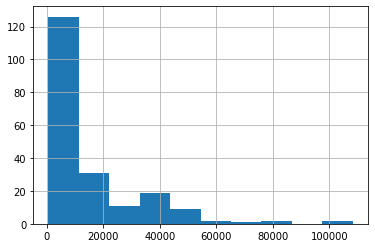

In [12]:
_ = income[2000].hist()

**c)**

In [13]:
def combineYear(year):
    return countries.merge(income).merge(life_exp, on = "geo.name", suffixes=('_income', '_lifeExp')).filter(items = ["geo.name"] + ["region"] + [str(year)+"_income"] + [str(year)+"_lifeExp"])

In [14]:
test = combineYear(1998)

In [15]:
test.head(5)

,geo.name,region,1998_income,1998_lifeExp
0,Algeria,AFRICA,9796.0,73.12
1,Angola,AFRICA,3499.0,52.83
2,Benin,AFRICA,1586.0,57.07
3,Botswana,AFRICA,9635.0,49.79
4,Burundi,AFRICA,795.0,47.28


**d)**

In [16]:
firstGroup = combineYear(1950)
firstGroup.insert(loc = 4, column = 'log_1950_income', allow_duplicates = True, value = firstGroup.filter(items = ['1950_income']).applymap(lambda x: math.log(x)))
firstGroup.head()

,geo.name,region,1950_income,1950_lifeExp,log_1950_income
0,Algeria,AFRICA,4003.0,46.85,8.294799
1,Angola,AFRICA,3180.0,36.60,8.064636
2,Benin,AFRICA,1289.0,35.68,7.161622
3,Botswana,AFRICA,837.0,48.04,6.729824
4,Burundi,AFRICA,513.0,39.03,6.240276


In [17]:
secondGroup = combineYear(2010)
secondGroup.insert(loc = 4, column = 'log_2010_income', allow_duplicates = True, value = secondGroup.filter(items = ['2010_income']).applymap(lambda x: math.log(x)))
secondGroup.head()

,geo.name,region,2010_income,2010_lifeExp,log_2010_income
0,Algeria,AFRICA,12870.0,76.55,9.462654
1,Angola,AFRICA,5895.0,60.08,8.681860
2,Benin,AFRICA,1819.0,61.82,7.506042
3,Botswana,AFRICA,13334.0,57.06,9.498072
4,Burundi,AFRICA,764.0,57.73,6.638568


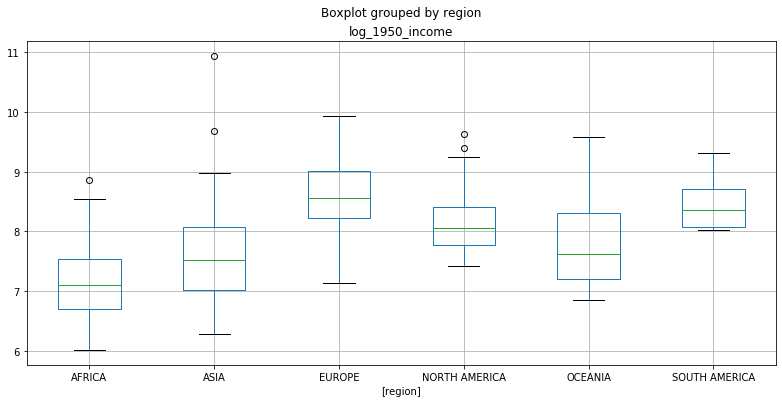

In [18]:
_ = firstGroup.boxplot(column = ['log_1950_income'], by = ['region'], figsize = (13,6))

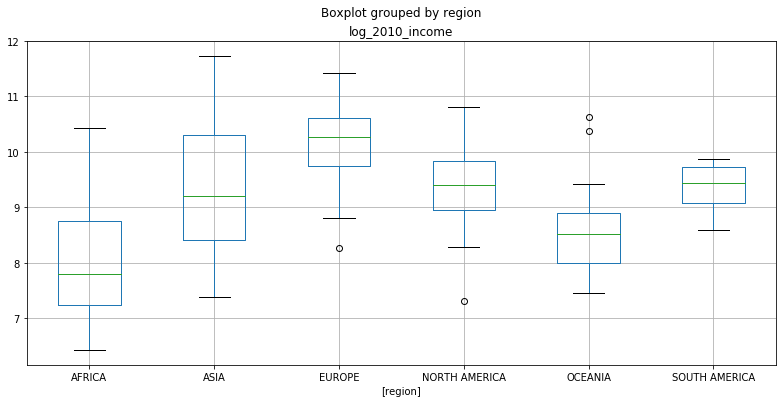

In [19]:
_ = secondGroup.boxplot(column = ['log_2010_income'], by = ['region'], figsize = (13,6))

In 60 years, the average income in every region has increased as we can see all the boxplots have shifted up from the first figure to the second figure. This makes sense since the global income should have increased over 60 years. 

The growth in average income seems to be similar between regions, except for Asia and North America which received more growth in the 60 years. This matches with the growth to become a super power by the USA and the growth of Asia in the global market (mainly coming from China). 

There is also a trend across regions for the distribution of the average income to become less skewered (North America, Oceania, and South America income distributions specfically becomes more normal). This trend signifies the shrinking wealth gap.

**d)**

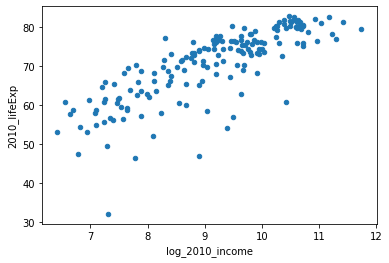

In [20]:
_ = secondGroup.plot.scatter(x = "log_2010_income", y = "2010_lifeExp")

There is a positive correlation between life expectancy and income per person in a country. The higher the average income of a country, the more likely that the country is a developed one. A more developed country tends to have better health care and living environments, which would lead to an increase in life expectancy.

## Exercise 2

**a)**

In [21]:
def getNumQueries():
    url = 'http://www.indeed.com/jobs?q=data+scientist&l='
    source = urlopen(url).read().decode('utf-8')
    soup = bs4.BeautifulSoup(source, "lxml")
    target = soup.find(id = "searchCount").contents[1].string
    result = int(target[(target.find("of ")+3):(target.find("jobs")-1)].replace(',', ''))
    return result

In [22]:
print(getNumQueries())

11967


**b)**

In [15]:
def getTermsHelper(pageNum):
    url = 'https://www.indeed.com/jobs?q=data%20scientist&start=' + str(pageNum)
    source = urlopen(url).read().decode('utf-8')
    soup = bs4.BeautifulSoup(source, "lxml")
    
    terms = ""
    
    ##getting all the summaries of the jobs from the divs that contains summary of the job
    summaryList = soup.find_all("div", class_= "summary")

    for summary in summaryList:
        
        #extracting descriptions (line by line) from each summary 
        descriptionList = summary.find_all("li")
        
        #extracting the string within each description
        for description in descriptionList:
            terms = terms + description.string + " "
    return terms

In [16]:
def getTerms():
    terms = ""
    for page in range(0, 1000, 10):
        #get the list of words on that page
        terms += getTermsHelper(page)
    return terms     
data = getTerms()

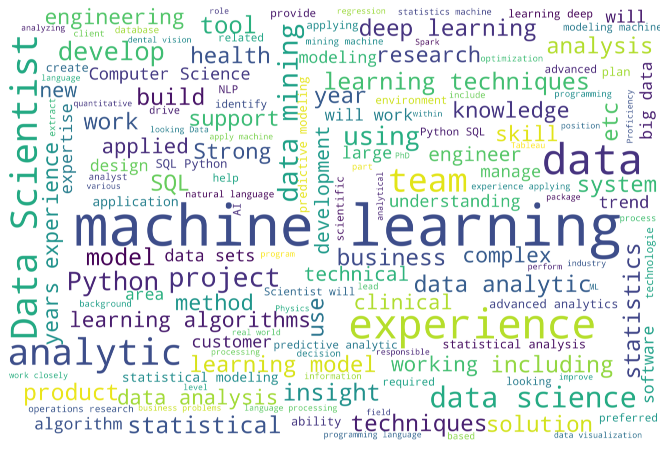

In [17]:
wordcloud = WordCloud(max_words=150, background_color="white", width = 1200, height = 800, scale = 10).generate(data)
plt.figure(figsize=[12,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**c)**

In [6]:
def getLocHelper(pageNum):
    url = 'https://www.indeed.com/jobs?q=data%20scientist&start=' + str(pageNum)
    source = urlopen(url).read().decode('utf-8')
    soup = bs4.BeautifulSoup(source, "lxml")
    
    citiesList = []
    for locContainer in soup.findAll("div", class_= "recJobLoc"):
        loc = locContainer.get("data-rc-loc")
        if loc is not None and loc != "United States" and loc != "Remote":
            citiesList.append(loc[:loc.find(",")])
            
    return citiesList

In [7]:
def getCitiesDict():
    citiesDict = {}
    for page in range(0, 1000, 10):        
        for city in getLocHelper(page):
            if city not in citiesDict:
                citiesDict[city] = 1
            else:
                citiesDict[city] += 1
    return citiesDict
citiesData = getCitiesDict()

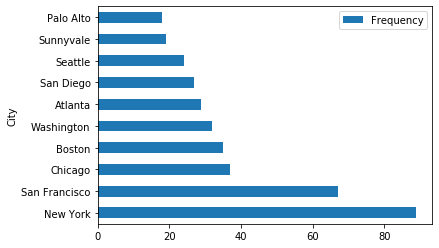

In [8]:
cities = pd.DataFrame.from_records(data = list(citiesData.items()), columns = ["City", "Frequency"])
_=cities.sort_values(by=["Frequency"],ascending=False).head(10).plot.barh(x='City', y='Frequency')